<a href="https://colab.research.google.com/github/williambrunos/Data-Visualization/blob/main/Class%203/Class%203.2/Quantitative_Data_Relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How does Quantitative Variables are related to each other?

Density graphs help us to discover how a quantitative variable is distributed among our data. However, sometimes he have more than one quantitative variable on our dataset, and we want to discover if they are **correlated**. 

**Correlation**: In statistics, this is a measure to understand if two variables change together at the same rate. Correlation is the most simple way to describe relations between two variables, without the influence of other variables, doesn't say nothing about **cause and effect** and is not too good for non linear relations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [3]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
df.isna().sum() # there is no NaN values on the dataset

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

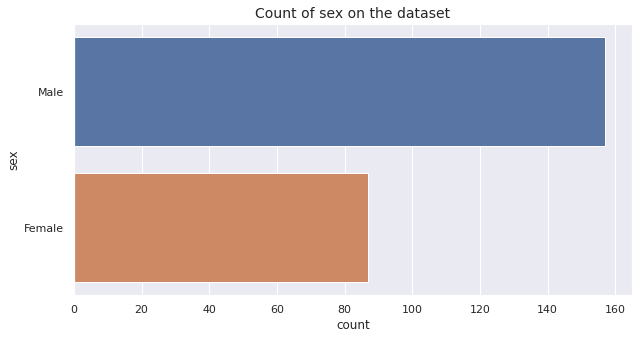

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Count of sex on the dataset', fontsize=14)
sns.countplot(data=df, y='sex')
plt.show()

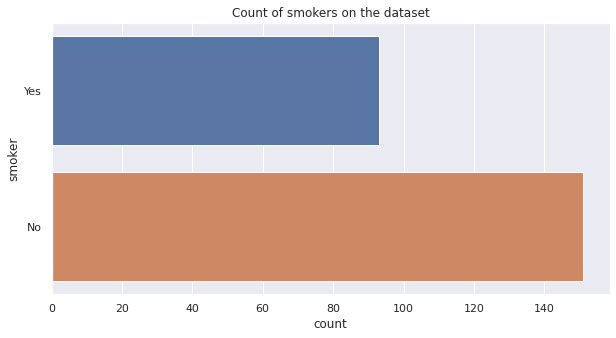

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Count of smokers on the dataset')
sns.countplot(data=df, y='smoker')
plt.show()

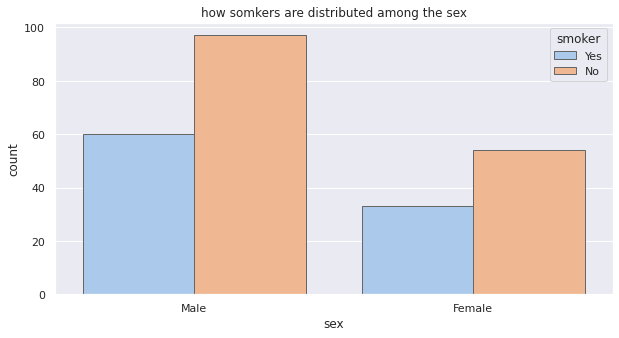

In [20]:
plt.figure(figsize=(10, 5))
plt.title('how somkers are distributed among the sex')
sns.countplot(data=df, x='sex', hue='smoker', palette='pastel', edgecolor='0.4')
plt.show()

The only reason that there are more smokers and non smokers among the male people is because our dataset has more male people observations.

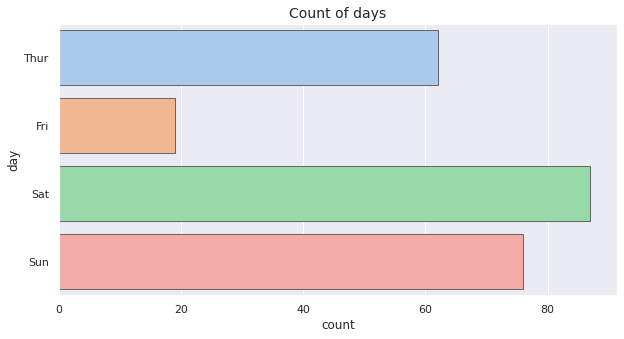

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Count of days', fontsize=14)
sns.countplot(data=df, y='day', palette='pastel', edgecolor='0.4')
plt.show()

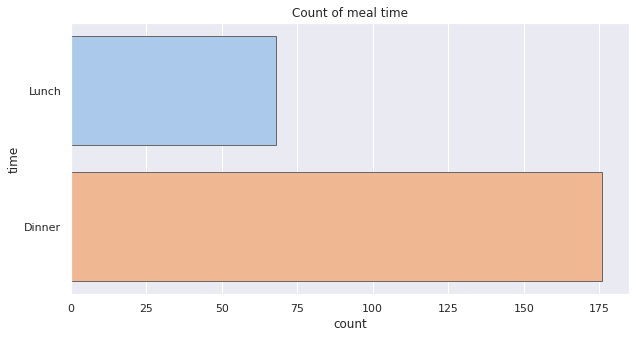

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Count of meal time')
sns.countplot(data=df, y='time', palette='pastel', edgecolor='0.4')
plt.show()

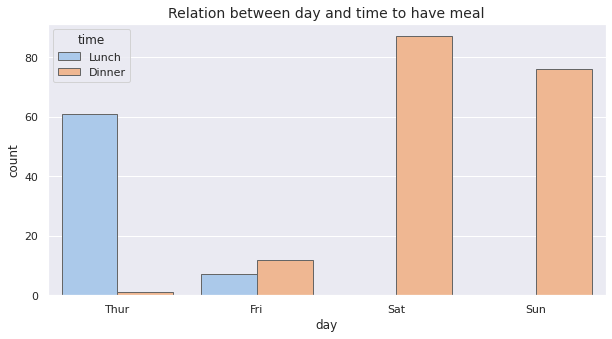

In [29]:
plt.figure(figsize=(10, 5))
plt.title('Relation between day and time to have meal', fontsize=14)
sns.countplot(data=df, x='day', hue='time', palette='pastel', edgecolor='0.4')
plt.show()

On thursday and friday, people go more to the restaurant to have lunch. Otherwise, people go more there on saturday and sunday to have dinner.

## Scatterplot

The scatterplot graph is a nice way to see on a cartesian plan how does two or more variables are related, and how does the growth of one affect the growth of the other.

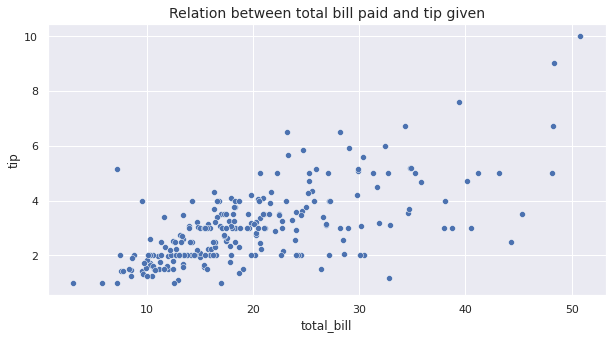

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Relation between total bill paid and tip given', fontsize=14)
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.show()

## Correlation

Correlation measures the tendency of a variable grow or decrease on the same rate of the growth of decrease of other variable. If the two variables has a good correlation, more the data of both variables can be fitted into a linear function. If the variables have bad correlation, the data among a scatter plot cannot be fitted into a linear function because those are very scattered.

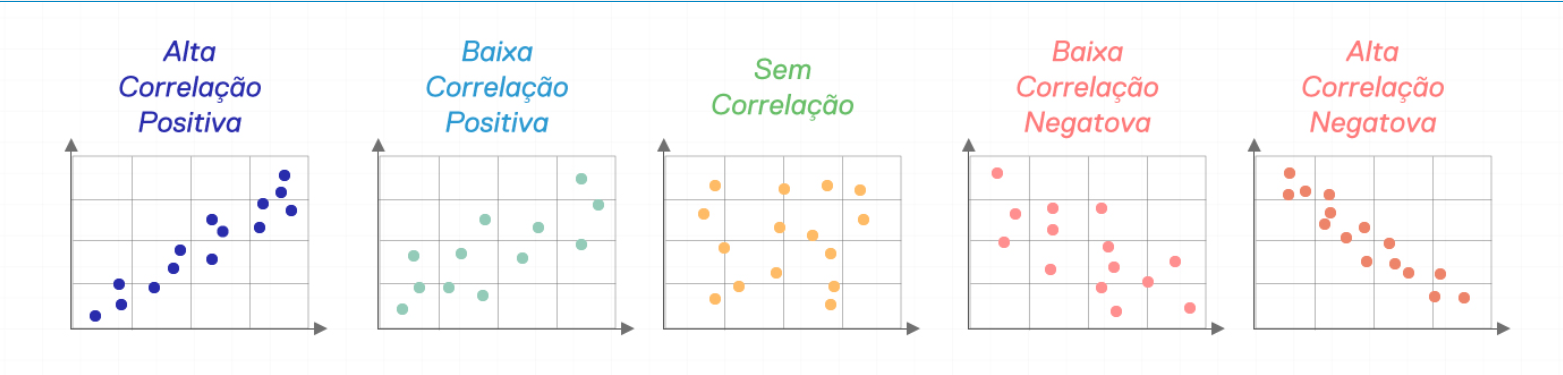

**CORRELATION DOES NOT IMPLIES ON CAUSALITY!**

Two variables can be well correlated, but one does not implies on the other. It's important to know the context of the data instead of just the "brute" values.

[Understanding Correlation](https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation.html#404f1893-ae56-43ed-b84c-f6c99f313eca)

[Correlation Coeficient](https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation/correlation-coefficient.html)

[Correlation VS Causation](https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation/correlation-vs-causation.html)

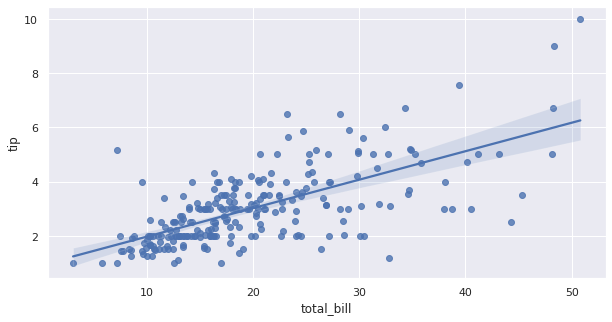

In [32]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='total_bill', y='tip')

## Scatter Graphs for more than two variables



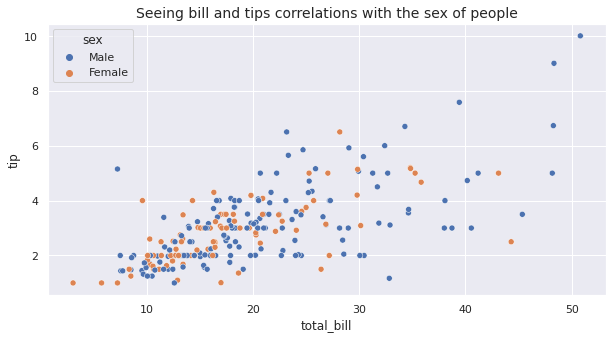

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Seeing bill and tips correlations with the sex of people', fontsize=14)
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex')
plt.show()

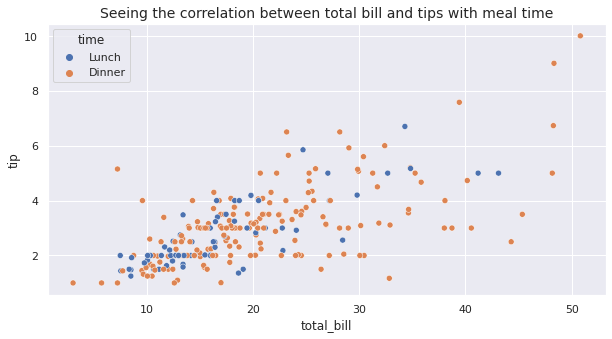

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Seeing the correlation between total bill and tips with meal time', fontsize=14)
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')

If we have too much classes to cover the hue attribute, the graph will have too many color and will not accomplish its function to be a simple way to see data.

A way out of this amount of classes on hue is use the ``relplot`` function, which disttributes the classes among columns. This function does not accepts plt settings.

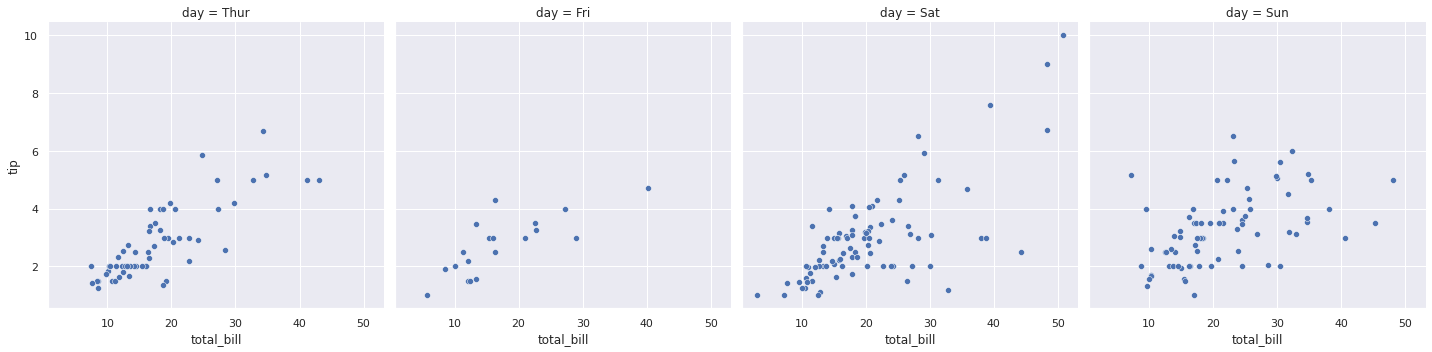

In [36]:
sns.relplot(data=df, x='total_bill', y='tip', col='day')

## lmplot

We cannot use hue on ``regplot``. Because of this, we have to use ``lmplot`` function to use hue (does not accept plt settings). 

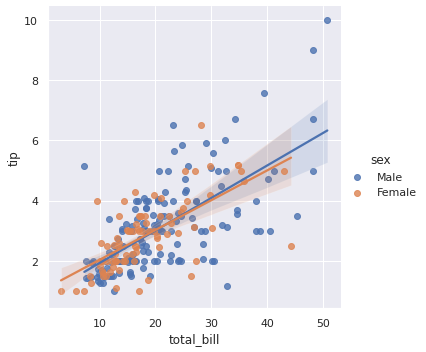

In [37]:
sns.lmplot(data=df, x='total_bill', y='tip', hue='sex')

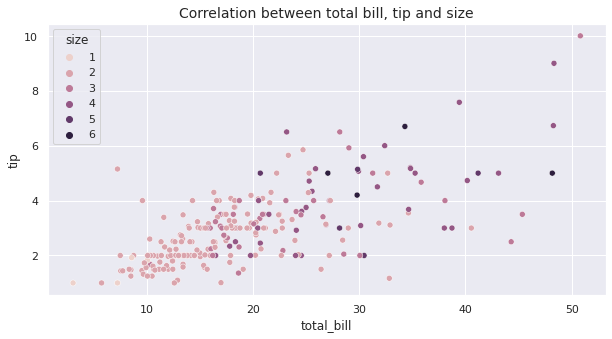

In [42]:
plt.figure(figsize=(10, 5))
plt.title('Correlation between total bill, tip and size', fontsize=14)
sns.scatterplot(data=df, x='total_bill', y='tip', hue='size')

## Bubble Graph

Bubble graphs and scatter plots for multiple 'hues' do bad visualization because it's too much information in one unique graph. Because of this, those graphs are used just to visualize general tendencies of the data.

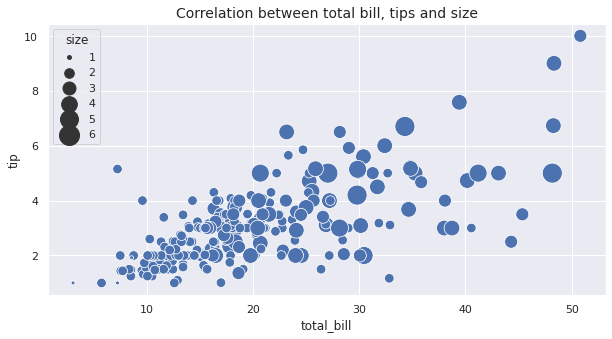

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Correlation between total bill, tips and size', fontsize=14)
sns.scatterplot(data=df, x='total_bill', y='tip', size='size', sizes=(15, 400))

## Quick Tip

- Very pilled data => Bad visualization for bubble graph and good for the color hue.
- Scattered data => Better visualization for bubble graph than for the color hue.

## Bad Pratice

**Put all the available information on one unique graph**

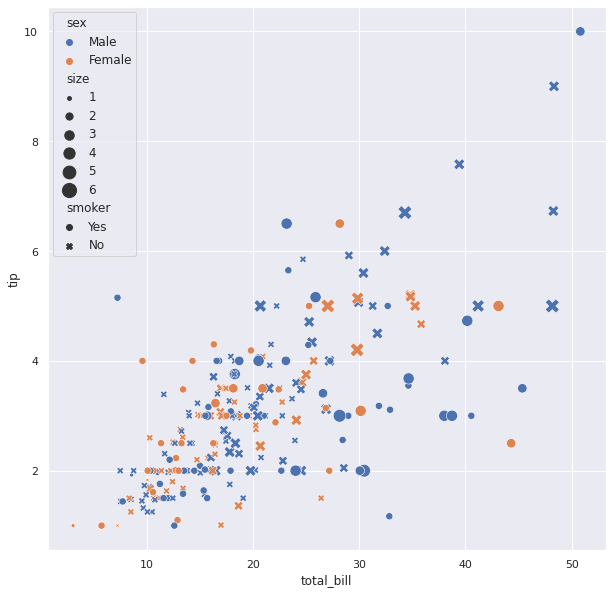

In [51]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="total_bill", y="tip", size = 'size', hue = 'sex', style = 'smoker', sizes=(15, 200), data=df)